# Figure 6: Switching strategies are favored over a larger range of conditions if environmental states are temporally autocorrelated

Goal: extend results for switching between two phenotypes to correlated environments

Needs to be run with matplotlib 1.5 because it uses a bug of how image plotting works there on nonlinear axes

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['../transitions.mplstyle'])
import matplotlib
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
black = matplotlib.rcParams['text.color']
from matplotlib import colors as mplcolors

import sys
sys.path.append('../lib/')
import plotting
import evolimmune, analysis

/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


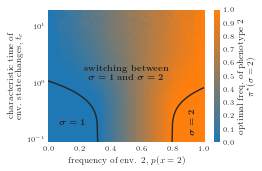

In [2]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3.5, 2.25))

df = analysis.loadnpz('data/opt.npz')
df['tauenv'] = evolimmune.to_tau(df['aenv'])
df['pi'] = df['alpha']/(df['alpha']+df['beta'])
w1 = df.f21.mean()
w2 = df.f12.mean()
ymin, ymax = 0.09, 20.0

cmap = mplcolors.LinearSegmentedColormap.from_list('mycmap', [colors[0], colors[1]])

Z = df.pivot(index='tauenv', columns='pienv', values='pi')
im, cbar = plotting.heatmap(Z, zlabel='optimal freq. of phenotype 2\n'+r'$\pi^\star(\sigma=2)$', cmap=cmap,
                            vmin=0.0, vmax=1, interpolation='nearest', ax=ax1)
cbar.outline.set_linewidth(0.0)
ax1.plot(*evolimmune.plow(w1, w2, df.aenv.min()), c=black)
ax1.plot(*evolimmune.phigh(w1, w2, df.aenv.min()), c=black)

ax1.text(0.92, 0.2, r'$\bm{\sigma=2}$', va='center', ha='center', color=black, rotation=90)
ax1.text(0.15, 0.2, r'$\bm{\sigma=1}$', va='center', ha='center', color=black)
ax1.text(0.5, 1.5, r'\bf switching between'+'\n'+r'$\bm{\sigma=1}$ \bf and $\bm{\sigma=2}$', va='center', ha='center', color=black)

ax1.set_xlabel(r'frequency of env. 2, $p(x=2)$')
ax1.set_ylabel('characteristic time of \n env. state changes, $t_c$')
ax1.set_xlim(0.0, 1.0)
ax1.set_ylim(ymin, ymax)
ax1.set_yscale('log')
plotting.despine(ax1, spines='all')

fig.tight_layout(pad=0.25)
fig.savefig('../svgs/corr2type.svg')

**Switching strategies are favored over a larger range of conditions if environmental states are temporally autocorrelated.**
        Here we generalize the results of Fig. 3A-C about transitions between switching and pure specialist strategies by considering the influence of environmental correlation.
        The numerically obtained optimal switching rate $\pi^\star(\sigma=2)$ is plotted as a function of $t_c$, the characteristic time scale of environmental changes, and $p(x=2)$, the fraction of the time the environment is in state 2.
        The range of environmental frequencies in which there is switching ($0 < \pi^\star < 1$) increases with temporal correlations.
        As a comparison we also show the analytical transition lines obtained in the text.